In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score

In [2]:
df=pd.read_csv('housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.keys()

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [10]:
df['parking'].head()

0    2
1    3
2    2
3    3
4    2
Name: parking, dtype: int64

In [11]:
counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [12]:
from sklearn.preprocessing import LabelEncoder
categ = ["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


<AxesSubplot: xlabel='bathrooms', ylabel='Count'>

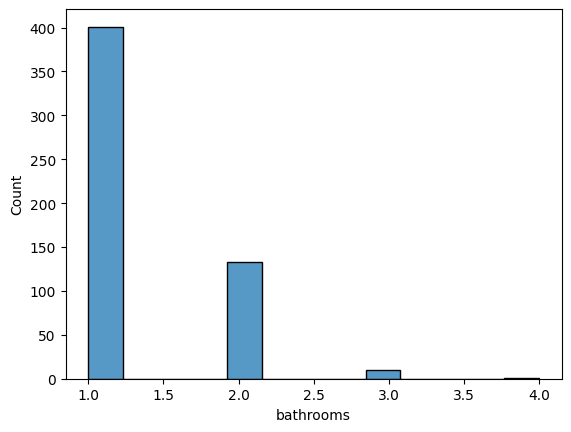

In [16]:
sns.histplot(df['bathrooms'])

<AxesSubplot: xlabel='stories', ylabel='Count'>

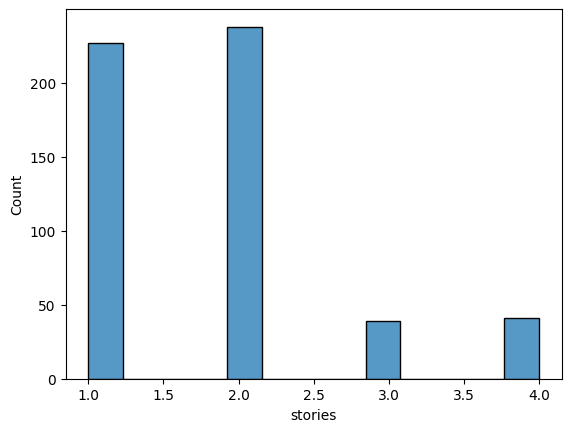

In [17]:
sns.histplot(df['stories'])

C:\Users\chaitanya\AppData\Local\Temp\ipykernel_30224\3104981836.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['parking'])


<AxesSubplot: xlabel='parking', ylabel='Density'>

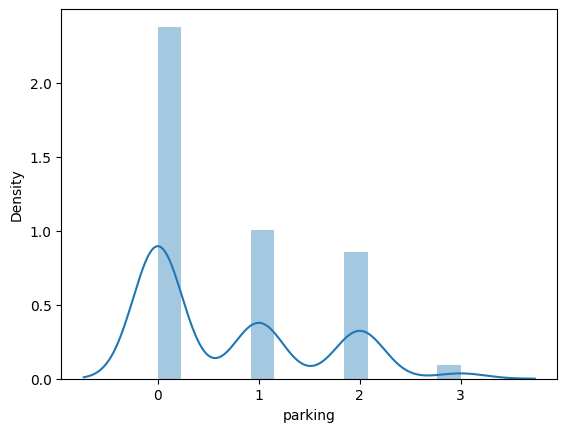

In [20]:
sns.distplot(df['parking'])

<AxesSubplot: >

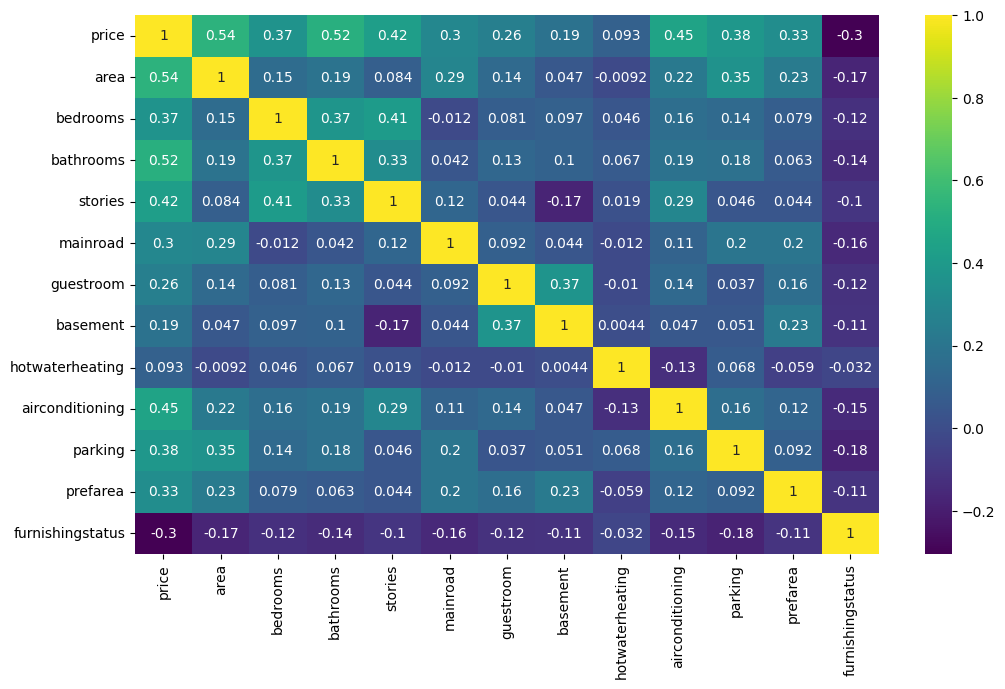

In [22]:
corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,cmap='viridis',annot=True)

In [23]:
X = df.drop(['price'],axis=1)
y = df['price']
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,2
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0,0,0


In [25]:
y=df['price']
y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [40]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_predict = model.predict(x_test)
y_predict

array([5407508.87024418, 7097185.46706855, 3055462.44314053,
       4476945.19636315, 3315983.65663579, 3618373.03255259,
       5758111.46044028, 6466502.43909126, 2830273.16469119,
       2588804.65810567, 9649589.31414054, 2830606.51113843,
       3048137.62898116, 3392779.60203048, 3823232.9673009 ,
       5358170.87034031, 2955016.41578148, 4836054.53230682,
       4603068.47740645, 3551464.60674927, 5625018.82657786,
       5796938.54363456, 2758483.74755246, 4873266.20950521,
       5600804.93370716, 7772078.63540938, 3381536.16270183,
       5370732.06725796, 8352665.9587942 , 3406110.06934798,
       6335677.41367624, 3427228.10570008, 6740746.88053742,
       4205633.93578768, 3624702.80095917, 5797171.46441145,
       5080025.13346592, 4386055.52335342, 3070137.54474224,
       4635050.40917587, 4743419.55702888, 3433682.48420934,
       7076940.4807988 , 4096598.07073101, 3741261.35302813,
       4308416.36745432, 6678982.6364043 , 4092649.04459023,
       3872211.05471678,

In [44]:
score = r2_score(y_test,y_predict)
score

0.6435419628959107